<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-2-Statistics/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

In [80]:
!ls
!head -n 100 house-votes-84.names

house-votes-84.data
house-votes-84.names
LS_DS_121_Statistics_Probability_and_Inference.ipynb
LS_DS_121_Statistics_Probability_Assignment.ipynb
notes.txt
1. Title: 1984 United States Congressional Voting Records Database

2. Source Information:
    (a) Source:  Congressional Quarterly Almanac, 98th Congress, 
                 2nd session 1984, Volume XL: Congressional Quarterly Inc. 
                 Washington, D.C., 1985.
    (b) Donor: Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
    (c) Date: 27 April 1987 

3. Past Usage
   - Publications
     1. Schlimmer, J. C. (1987).  Concept acquisition through 
        representational adjustment.  Doctoral dissertation, Department of 
        Information and Computer Science, University of California, Irvine, CA.
        -- Results: about 90%-95% accuracy appears to be STAGGER's asymptote
     - Predicted attribute: party affiliation (2 classes)

4. Relevant Information:
      This data set includes votes for each of the U.S. House of

In [3]:
x = "   6. el-salvador-aid: 2 (y,n)"
#pat = re.compile('\d+.\s([A-Za-z-]+):)
pat = re.compile(r'\s+\d+.\s([A-Za-z-\s]+):\s\d\s')

print(pat.match(x).group(1))


el-salvador-aid


In [34]:
### YOUR CODE STARTS HERE
from scipy import stats
import pandas as pd      #probably can do this all without dataframes but im feeling lazy
import numpy as np
import re
#LOAD DATA , CHECK FORMAT.
#using https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records
#per the data description the "?" indicates that the member was present and either abstained or used 
#procedure to avoid voting on the issue therefore we are going to class this result with nays as in 
# 'not willing to support'
# An alternative woud be to simply calculate the ratio of yeas to nays, but i dont think this reflects the 
# reality of how voting works in practice. an absolute number of yeas is required to pass a bill
# what about 1, 0, -1  for mapping? 

start = re.compile("7.\sAttribute")
pat = re.compile(r'\s+\d+.\s([A-Za-z-\s]+):\s\d\s')  #extract column names
columns=[]
with open('house-votes-84.names', 'r') as f:
    line = f.readline()
    cnt = 1
    while line:
        if start.match(line):
            line = f.readline()  #read next line and process. until done and break
            while pat.match(line):
            #    print(pat.match(line).group(1))  #print the match -> add to lis    
                line = f.readline()  #read next line and process.
                
        else:
            line = f.readline() #not started, read nextline
            cnt += 1
##that was fun
with open('house-votes-84.names', 'r') as f:
    txt = f.read()
    columns = pat.findall(txt)                   #this is what we want



267


MultiIndex([(     'adoption-of-the-budget-resolution',   'democrat'),
            (     'adoption-of-the-budget-resolution', 'republican'),
            (             'aid-to-nicaraguan-contras',   'democrat'),
            (             'aid-to-nicaraguan-contras', 'republican'),
            (               'anti-satellite-test-ban',   'democrat'),
            (               'anti-satellite-test-ban', 'republican'),
            (                                 'crime',   'democrat'),
            (                                 'crime', 'republican'),
            (                     'duty-free-exports',   'democrat'),
            (                     'duty-free-exports', 'republican'),
            (                    'education-spending',   'democrat'),
            (                    'education-spending', 'republican'),
            (                       'el-salvador-aid',   'democrat'),
            (                       'el-salvador-aid', 'republican'),
            ('export

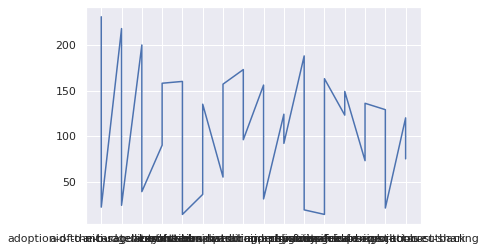

In [252]:
df= pd.read_csv('house-votes-84.data', names=columns)
##
df=df.reset_index()      
df.rename({'index': 'voteinstance'}, axis =1, inplace=True)
df = df.melt(id_vars=['voteinstance','Class Name'], var_name='issue',value_name='vote')


filter = df['issue'] == 'handicapped-infants'
df.vote = df['vote'].apply(lambda v : 1 if (v == 'y') else 0)
df[filter].groupby(by='Class Name',axis=0).sum()
votecounts =  df.groupby(by=['issue','Class Name'],axis=0).sum()  #rename vote to support
votecounts.drop(labels='voteinstance', axis=1,inplace=True)

tot_voters = df[filter]["Class Name"].count()  # Total number voters per issue
voters_by_party = df[filter]["Class Name"].value_counts()  #number voters per party per issue
print(voters_by_party['democrat'])
#votecounts['party_percent'] = 
votecounts.dtypes
#.apply(lambda p,v : v / voters_by_party[p])

import matplotlib.pyplot as plt
plt.plot(votecounts.reset_index().issue, votecounts.vote)
votecounts.reset_index()[votecounts.reset_index()['issue'] == 'immigration']#
votecounts.index


## Stretch Goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Then check your Answers using Scipy!

In [261]:

obs_marg =  pd.crosstab(df['Class Name'], df['issue'], margins=all)
obs_marg.shape
row_sums= obs_marg.iloc[0:2, 0:17].values
#row_sums= obs_marg.iloc[0:2, 0:17].values

expected = []
 for i in range(len(row_susms)):
        expected_row =
chi2 = ((observed - expected)**2/ expected).sum().sum()

####
#run chi2 test using scipy
from scipy import stats
chi2, p_value, dof, expected = stats.chi2_contingeny(observered) # contingency table = observations pluss rown colmumn sums


In [ ]:
  # RUN TH  TTEST against 2 classes

267


vote
issue                                  Class Name      
adoption-of-the-budget-resolution      democrat     231
                                       republican    22
aid-to-nicaraguan-contras              democrat     218
                                       republican    24
anti-satellite-test-ban                democrat     200
                                       republican    39
crime                                  democrat      90
                                       republican   158
duty-free-exports                      democrat     160
                                       republican    14
education-spending                     democrat      36
                                       republican   135
el-salvador-aid                        democrat      55
                                       republican   157
export-administration-act-south-africa democrat     173
                                       republican    96
handicapped-infants                    democrat     156
                                       republican    31
immigration                            democrat     124
                                       republican    92
mx-missile                             democrat     188
                                       republican    19
physician-fee-freeze                   democrat      14
                                       republican   163
religious-groups-in-schools            democrat     123
                                       republican   149
superfund-right-to-sue                 democrat      73
                                       republican   136
synfuels-corporation-cutback           democrat     129
                                       republican    21
water-project-cost-sharing             democrat     120
                                       republican    75

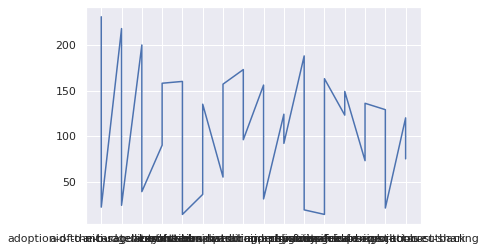

In [229]:
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  x_bar = np.mean(data)
  n = len(data)
  s = np.std(data, ddof=1)
  std_err = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*std_err
  lower_bound = x_bar - margin_of_error
  upper_bound = x_bar + margin_of_error
  return (lower_bound, x_bar, upper_bound, )
